In [1]:
%config IPCompleter.greedy=True

# Air Quality Project

We will be working with air quality measurements that are being collected continously from sensors deployed around the world. All the data are collected by Open Air Quality and made open. You can see more information here:

https://openaq.org/

There is an online API that allow you to probe data directly, but for this practical we will work with offline data that we have already downloaded beforehand. At the Appendix at the end of the notebook you can see an example of how you can use the API to retrieve fresh data directly from the server.

We will use pandas and matplotlib to deal with data and do useful visualisations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Cities

Our data comes from sensors that are located in different cities in the world. The latest information about the cities that participate in the programe can be retrieved using the online API (see appendix for the code).

In the cities.csv file you can find an saved version of the server's response retrieved in January 2021. We will use pandas to open this file into a pandas frame. At the time of opening, we will also specify that we want to use the first column as the index column.

In [3]:
cities = pd.read_csv("cities.csv", index_col = 0)

Let's first check a summary of the contents of our frame, and display the first few lines to get an idea of what is in our frame

In [4]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 0 to 3298
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    3299 non-null   object
 1   name       3260 non-null   object
 2   city       3260 non-null   object
 3   count      3299 non-null   int64 
 4   locations  3299 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 154.6+ KB


In [5]:
cities.head()

,country,name,city,count,locations
0,AD,Escaldes-Engordany,Escaldes-Engordany,210321,2
1,AD,unused,unused,16301,1
2,AE,Abu Dhabi,Abu Dhabi,480917,1
3,AE,Dubai,Dubai,474835,1
4,AE,NaN,NaN,51901,2


It seems like we have 3,299 entries that correspond to different cities in the world. Some of them seem to miss the `name` and `city` information.

<font color="blue">**Exercise 1:** Display the first ten of the rows that have a null value in the name column</font>

In [45]:
# Your Code here
top_10_no_name_cities = cities[cities["name"].isnull()].head(10)
print(top_10_no_name_cities)

    country name city   count  locations
4        AE  NaN  NaN   51901          2
6        AF  NaN  NaN    8115          1
7        AG  NaN  NaN       1          1
108      BA  NaN  NaN   17428          1
128      BG  NaN  NaN    8968          1
146      BK  NaN  NaN   15360          1
147      BM  NaN  NaN   15203          1
190      CA  NaN  NaN  664744         17
199      CD  NaN  NaN       3          1
200      CE  NaN  NaN    8153          1


The number of measurements (`count`) and the number of sensor locations (`locations`) of each city seem to vary a lot. Let's ask pandas to descibe us some key aspects of these columns:

In [46]:
cities[["count", "locations"]].describe()

,count,locations
count,3.299000e+03,3299.000000
mean,2.811092e+05,4.722643
std,9.627019e+05,12.565284
min,1.000000e+00,1.000000
25%,3.276800e+04,1.000000
50%,9.983300e+04,2.000000
75%,2.846910e+05,4.000000
max,1.955096e+07,174.000000


Note that if we call `describe()` on the whole dataframe, it will give us the same information. This is because this function only operates on numerical columns, and `count` and `locations` are the only two numerical columns here (check the info that we printed out before).

In [8]:
cities.describe()

,count,locations
count,3.299000e+03,3299.000000
mean,2.811092e+05,4.722643
std,9.627019e+05,12.565284
min,1.000000e+00,1.000000
25%,3.276800e+04,1.000000
50%,9.983300e+04,2.000000
75%,2.846910e+05,4.000000
max,1.955096e+07,174.000000


We will focus only on the cities from Spain, we can filter these cities by checking for the entry `"ES"` in the column `"country"`

In [9]:
cities[cities["country"] == "ES"]

,country,name,city,count,locations
882,ES,A Coruña,A Coruña,344097,5
883,ES,Albacete,Albacete,86387,1
884,ES,Alcala De Guadaira,Alcala De Guadaira,55949,1
885,ES,Algeciras,Algeciras,111195,2
886,ES,Alicante/Alacant,Alicante/Alacant,565573,10
...,...,...,...,...,...
992,ES,Valladolid,Valladolid,307720,9
993,ES,Villaharta,Villaharta,56817,1
994,ES,Villanueva Del Arzobispo,Villanueva Del Arzobispo,29446,1
995,ES,Zamora,Zamora,59197,1


<font color="blue">**Exercise 2:** These are too many cities, let's look only for `"Zaragoza"` (in Spain).</font>

>*hint: use `&` to combine boolean statements*

In [49]:
# Your code here
cities[(cities["name"] == "Zaragoza") & (cities["country"] == "ES")]

,country,name,city,count,locations
996,ES,Zaragoza,Zaragoza,529603,10


Finally, let's see what is available for Barcelona

In [11]:
cities[cities["name"] == "Barcelona"]

,country,name,city,count,locations
899,ES,Barcelona,Barcelona,1538814,45


There are 45 sensor locations in the Barcelona area. The next step would be to see what information is available for these 45 sensors.

## Sensor Locations

We can probe for information about the locations of a specific city using the online API (see appendix for the code). Here we will be using data retrieved in January 2021. In the `BCN_Locations.csv` file we have saved information about all locations available in the Barcelona area.

In [50]:
BCN_Locations = pd.read_csv("BCN_Locations.csv", index_col = 0)

In [51]:
BCN_Locations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 44
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45 non-null     object 
 1   country                45 non-null     object 
 2   city                   45 non-null     object 
 3   cities                 45 non-null     object 
 4   location               45 non-null     object 
 5   locations              45 non-null     object 
 6   sourceName             45 non-null     object 
 7   sourceNames            45 non-null     object 
 8   sourceType             45 non-null     object 
 9   sourceTypes            45 non-null     object 
 10  firstUpdated           45 non-null     object 
 11  lastUpdated            45 non-null     object 
 12  parameters             45 non-null     object 
 13  countsByMeasurement    45 non-null     object 
 14  count                  45 non-null     int64  
 15  coordinates.l

In [53]:
BCN_Locations.head()

,id,country,city,cities,location,locations,sourceName,sourceNames,sourceType,sourceTypes,firstUpdated,lastUpdated,parameters,countsByMeasurement,count,coordinates.longitude,coordinates.latitude
0,ES-53,ES,Barcelona,"['CCAA Cataluña', 'CCAA Catalu�a', 'Barcelona']",ES0584A,"['Montcada i Reixac (pl. de Lluís Companys)', ...",EEA Spain,['EEA Spain'],government,['government'],2016-11-17 23:00:00+00:00,2021-01-30 06:00:00+00:00,"['co', 'no2', 'o3', 'so2']","[{'parameter': 'co', 'count': 18165}, {'parame...",67153,2.18830,41.48202
1,ES-285,ES,Barcelona,"['CCAA Cataluña', 'CCAA Catalu�a', 'Barcelona']",ES0691A,"['Barcelona (el Poblenou)', 'ES0691A']",EEA Spain,['EEA Spain'],government,['government'],2016-11-18 03:00:00+00:00,2021-01-30 06:00:00+00:00,['no2'],"[{'parameter': 'no2', 'count': 17549}]",17549,2.20452,41.40388
2,ES-174,ES,Barcelona,"['CCAA Cataluña', 'CCAA Catalu�a', 'Barcelona']",ES0692A,"[""l'Hospitalet de Llobregat (av. del Torrent G...",EEA Spain,['EEA Spain'],government,['government'],2016-11-17 23:00:00+00:00,2021-01-30 06:00:00+00:00,"['no2', 'pm10']","[{'parameter': 'no2', 'count': 17821}, {'param...",29335,2.11497,41.37050
3,ES-58,ES,Barcelona,"['CCAA Cataluña', 'CCAA Catalu�a', 'Barcelona']",ES0694A,['Sant Vicenç dels Horts (Ribot - Sant Miquel)...,EEA Spain,['EEA Spain'],government,['government'],2016-11-17 23:00:00+00:00,2021-01-30 06:00:00+00:00,"['no2', 'o3', 'pm10', 'so2']","[{'parameter': 'no2', 'count': 17862}, {'param...",65104,2.00980,41.39216
4,ES-19,ES,Barcelona,"['CCAA Cataluña', 'CCAA Catalu�a', 'Barcelona']",ES0971A,"['Sant Andreu de la Barca (CEIP Josep Pla)', '...",EEA Spain,['EEA Spain'],government,['government'],2016-11-17 23:00:00+00:00,2021-01-30 06:00:00+00:00,['no2'],"[{'parameter': 'no2', 'count': 17604}]",17604,1.97489,41.45077


<font color="blue">**Exercise 3:** The closest sensor locations to the UAB campus are the ones in Sant Cugat and in Sabadell. Their location codes are `ES1231A` and `ES1262A`. Can you retrieve these two entries from the frame?</font>

In [ ]:
#Your code here
BCN_Locations[(BCN_Locations["location"]== "ES1231A") | (BCN_Locations["location"]== "ES1262A")]

,id,country,city,cities,location,locations,sourceName,sourceNames,sourceType,sourceTypes,firstUpdated,lastUpdated,parameters,countsByMeasurement,count,coordinates.longitude,coordinates.latitude
11,ES-111,ES,Barcelona,"['CCAA Cataluña', 'CCAA Catalu�a', 'Barcelona']",ES1231A,['Sant Cugat del Vallès (parc de Sant Francesc...,EEA Spain,['EEA Spain'],government,['government'],2016-11-17 23:00:00+00:00,2021-01-30 06:00:00+00:00,"['no2', 'o3']","[{'parameter': 'no2', 'count': 17500}, {'param...",34934,2.08898,41.47677
12,ES-116,ES,Barcelona,"['CCAA Cataluña', 'CCAA Catalu�a', 'Barcelona']",ES1262A,"['Sabadell (Gran Via)', 'ES1262A']",EEA Spain,['EEA Spain'],government,['government'],2016-11-17 23:00:00+00:00,2021-01-30 06:00:00+00:00,"['no2', 'o3']","[{'parameter': 'no2', 'count': 17997}, {'param...",31404,2.10141,41.56118


<font color="blue">**Exercise 4:** What air quality parameters do they monitor in the two selected locations? How many measurements are available in each location? Print out just the location code, and the columns `parameters` and `count`</font>

In [63]:
#Your code here
BCN_Locations[(BCN_Locations["location"]== "ES1231A") | (BCN_Locations["location"]== "ES1262A")][["location", "parameters", "count"]]

,location,parameters,count
11,ES1231A,"['no2', 'o3']",34934
12,ES1262A,"['no2', 'o3']",31404


## Measurements

We are interested in measurements about NO2 in the area of Barcelona. We will ask for the latest 10,000 data points about these two specific parameters from any sensor located in Barcelona. See in the Appendix how to achieve this using the API, here we will be using previously retrieved results.

We know that some of the columns are actually dates, so at the time of opening the CSV file we specify which columns should be parsed as dates. We ask for one of these columns to also be our index column.

In [17]:
# NO2 measurements from the BCN area
BCN_MeasurementsNO2 = pd.read_csv("BCN_MeasurementsNO2.csv", index_col = "date.local", parse_dates=["date.local", "date.utc"])
BCN_MeasurementsNO2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2021-01-30 20:00:00 to 2021-01-13 07:00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   location               10000 non-null  object             
 1   parameter              10000 non-null  object             
 2   value                  10000 non-null  float64            
 3   unit                   10000 non-null  object             
 4   country                10000 non-null  object             
 5   city                   10000 non-null  object             
 6   date.utc               10000 non-null  datetime64[ns, UTC]
 7   coordinates.latitude   10000 non-null  float64            
 8   coordinates.longitude  10000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 781.2+ KB


In [18]:
BCN_MeasurementsNO2.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-01-30 20:00:00,ES1126A,no2,9.0,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 19:00:00+00:00,41.475409,1.921203
2021-01-30 20:00:00,ES1815A,no2,3.0,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 19:00:00+00:00,41.346823,1.686575
2021-01-30 20:00:00,ES1262A,no2,14.0,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 19:00:00+00:00,41.561175,2.101405
2021-01-30 20:00:00,ES1992A,no2,4.0,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 19:00:00+00:00,41.387485,2.115150
2021-01-30 20:00:00,ES1856A,no2,5.0,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 19:00:00+00:00,41.426077,2.147992


Measurements come in at different times from random locations. It would be good to group them by `location` and then check a description of the `value` column for each of the groups. This can be achieved using the `groupy()` function:

In [64]:
BCN_MeasurementsNO2.groupby(['location'])["value"].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
ES0584A,264.0,40.113636,18.211327,3.0,27.000,38.0,53.000,88.0
ES0691A,275.0,39.538182,18.276700,7.0,26.000,39.0,52.000,84.0
ES0692A,264.0,33.102273,19.881803,4.0,16.000,30.0,48.000,89.0
ES0694A,274.0,37.689781,16.202771,4.0,27.000,38.0,49.750,75.0
ES0971A,272.0,35.477941,17.868303,1.0,24.000,35.0,47.000,84.0
ES1018A,263.0,28.752852,20.793325,3.0,13.000,22.0,42.500,106.0
ES1125A,274.0,27.638686,13.715213,11.0,17.000,24.0,36.000,71.0
ES1126A,272.0,33.275735,14.609343,7.0,23.000,31.0,42.000,85.0
ES1135A,273.0,23.454212,14.749586,4.0,12.000,19.0,32.000,75.0


<font color="blue">**Exercise 5:** Read the documentation entry for the `groupby()` function here:</font>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Can you explain what the function call we used above did?


---


Generally, function 

BCN_MeasurementsNO2.groupby(['location'])["value"].describe()

groups measurements by location, and then describes each group by .describe(). This way we are creating just one row for every location, and we also get summarized description of data concerning this location

---

Next we will focus on Sant Cugat's measurements. We have downloaded the latest 10,000 measurements from that location and saved them in the `StC_Measurements.csv` file. The file contains all measurements (from different parameters).

In [66]:
StC_Measurements = pd.read_csv("StC_Measurements.csv", index_col = "date.local", parse_dates=["date.local", "date.utc"])
StC_Measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2021-01-30 21:00:00 to 2019-11-11 06:00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   location               10000 non-null  object             
 1   parameter              10000 non-null  object             
 2   value                  10000 non-null  int64              
 3   unit                   10000 non-null  object             
 4   country                10000 non-null  object             
 5   city                   10000 non-null  object             
 6   date.utc               10000 non-null  datetime64[ns, UTC]
 7   coordinates.latitude   10000 non-null  float64            
 8   coordinates.longitude  10000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 781.2+ KB


In [21]:
StC_Measurements.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-01-30 21:00:00,ES1231A,no2,10,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 20:00:00+00:00,41.476769,2.088977
2021-01-30 21:00:00,ES1231A,o3,62,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 20:00:00+00:00,41.476769,2.088977
2021-01-30 20:00:00,ES1231A,o3,69,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 19:00:00+00:00,41.476769,2.088977
2021-01-30 20:00:00,ES1231A,no2,7,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 19:00:00+00:00,41.476769,2.088977
2021-01-30 19:00:00,ES1231A,no2,11,b'\xc2\xb5g/m\xc2\xb3',ES,Barcelona,2021-01-30 18:00:00+00:00,41.476769,2.088977


We can do a plot directly from a pandas frame, we just need to specify which rows to plot, and which columns correspond to the x and y coordinates of our plot. Let's do this here by selecting only the rows corresponding to O3, and plotting the date (`date.utc`) versus the `value` that we measured.

<Axes: xlabel='date.utc'>

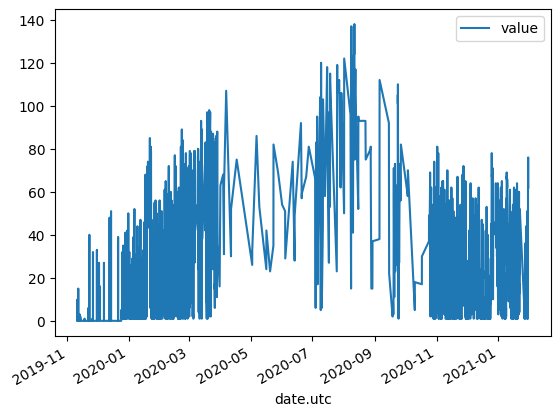

In [73]:
StC_Measurements[StC_Measurements["parameter"] == "o3"].plot(x = "date.utc", y="value")

<font color="blue">**Exercise 6:** Instead of selecting a specific parameters, group by parameter, and do the same plot for each of them. Try to do it in a single line of code using `groupby()`.</font>

parameter
no2    Axes(0.125,0.2;0.775x0.68)
o3     Axes(0.125,0.2;0.775x0.68)
dtype: object

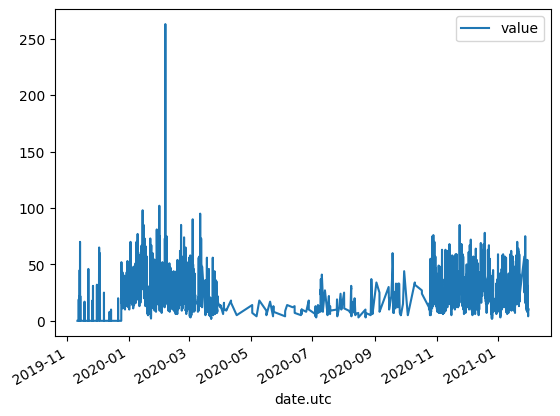

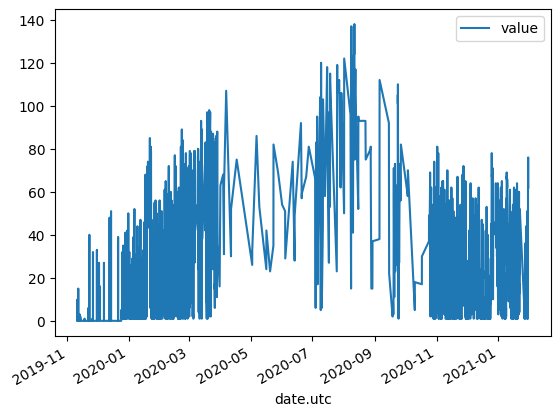

In [75]:
# Your code here

StC_Measurements.groupby(["parameter"]).plot(x = "date.utc", y="value")

# Appendix - Using the Open Air Quality API

In order to use the API through Python you should first install the py-openaq module in your local python installation. Installation istructions are available here:

https://dhhagan.github.io/py-openaq/installing.html

Once you have installed the module, you should be able to import it and run the code below

In [68]:
import openaq

api = openaq.OpenAQ()

To probe for the list of cities (returned as a pandas dataframe) you can run the following

In [ ]:
cities = api.cities(df = True, limit = 10000)

To get information about the locations in a specific city, or a whole country:

In [ ]:
BCN_Locations = api.locations(city='Barcelona', df=True)
ES_Locations = api.locations(country='ES', df=True, limit=10000)

To retrieve specific measurements from a specific city:

In [ ]:
BCN_MeasurementsNO2 = api.measurements(city='Barcelona', parameter='no2', limit=10000, df=True)
BCN_MeasurementsO3 = api.measurements(city='Barcelona', parameter='o3', limit=10000, df=True)

A comprehensive tutorial can be found at:

https://dhhagan.github.io/py-openaq/tutorial.html